In [32]:
import re
import pandas as pd 
from collections import Counter
import matplotlib.pyplot as plt
pd.options.display.max_colwidth= None


In [33]:
df = pd.read_excel('../data_processed/education_1.xlsx')

In [34]:
# Remove double space
df['text'] = df['text'].astype(str)
def doublespace(text):
    return re.sub(r'\s+', ' ', text).strip()
df['text'] = df['text'].apply(doublespace)

In [35]:
def whitespace(columns_name, text):
    df[columns_name] = df[columns_name].replace('', '', regex=True) #remove empty string
    df[columns_name] = df[columns_name].str.strip() #remove whitespace
whitespace('name',df)
whitespace('text',df)

##### Remove all ASCII characters from Name column and text columns

In [36]:
# def remove_non_ascii(df, column_name):
#     # iterate over each row in the specified column
#     for index, row in df.iterrows():
#         if isinstance(row[column_name], str):
#             # encode the text as ASCII, ignoring any non-ASCII characters
#             text = row[column_name].encode('ascii', 'ignore').decode()
#             # update the dfframe with the modified text
#             df.at[index, column_name] = text
#     return df
# df = remove_non_ascii(df, 'name')
# df = remove_non_ascii(df, 'text')


##### Change Timezone "2019-10-13 04:14:52" to "2019-10-13"

In [37]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce').dt.date.astype(str)

In [38]:
len(df['name'].unique())

466

In [39]:
df.shape

(287761, 8)

##### Get the most #hastags or trends


In [40]:
import re
from collections import Counter
# Extract hashtags from text
hashtags = []
for text in df['text']:
    if isinstance(text, str):
        hashtags.extend(re.findall(r'#\w+', text))
# Count frequency of hashtags
freq = Counter(hashtags)
# Get top 10 hashtags
top_hashtags = freq.most_common(10)
# Print top 10 hashtags and their counts as named constants
for i, (hashtag, count) in enumerate(top_hashtags):
    print(f"{hashtag.replace('#', '').title()} = {count}")

##### Visualize  the most trends

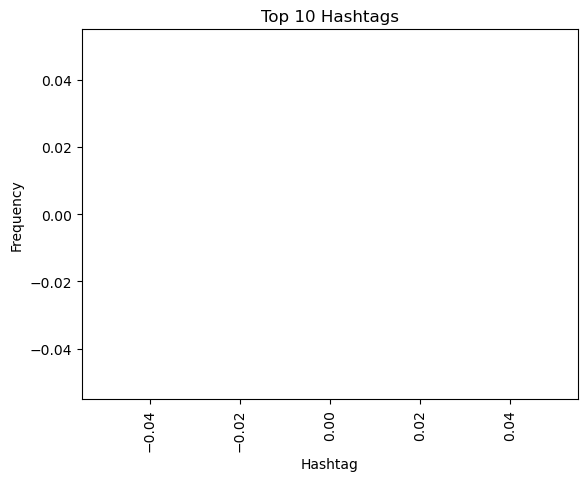

In [41]:
hashtag_counts = [count for hashtag, count in top_hashtags]
hashtag_labels = [hashtag for hashtag, count in top_hashtags]
plt.bar(hashtag_labels, hashtag_counts)
plt.xticks(rotation=90)
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.show()

In [42]:
def lower_and_white_space(df, column_name):
    df[column_name] = df[column_name].str.lower().str.strip()
    return df
df = lower_and_white_space(df, 'text')

##### Replace abbreviations

In [43]:
df.shape

(287761, 8)

In [44]:
#remove hastags
def remove_hashtags(text):
    text = re.sub(r'#(\w+)', '', str(text))
    return text
df['text'] =df['text'].apply(remove_hashtags)


In [45]:
df.dropna(subset=['text'], inplace=True) #remove nan value
df.drop_duplicates(subset=['text'], inplace=True) #remove nan duplicate value

In [46]:
df.shape

(287231, 8)

In [47]:
#remove 1,2,3 words from tweets, such as interesting article, Afghan girl... 
def remove_two_word_rows(df, column_name):
    # get the index of rows with two-word values in the specified column
    two_word_rows = df[df[column_name].str.split().str.len() == 3].index
    # drop the two-word rows from the dfframe
    df = df.drop(two_word_rows, axis=0)
    return df
df = remove_two_word_rows(df, 'text')


In [48]:
df.shape

(287179, 8)

In [51]:
#check if the word exists inside the tweet, remove the whole row
words_to_drop =[
  'haha', 'yshray', 'aojpoindkme',
  'ibnafghan','mominshahkakar', 'followme', 'goodarzazai', 
  'kids','khushalgurbaz','manzoorpashteen','kid',
  'ukraine'
]
for word in words_to_drop:
    df = df[~df['text'].str.contains(word, case=False)]
df.dropna(subset=['text'], inplace=True) #remove nan value
df.drop_duplicates(subset=['text'], inplace=True) #remove nan duplicate value

In [53]:
df.shape

(283982, 8)

In [ ]:
# def remove_punctuations(text):
#     for punctuation in string.punctuation:
#         text = text.replace(punctuation, '')
#     return text
# # Apply to the DF series
# df['text'] = df['text'].apply(remove_punctuations)

In [56]:
df.dropna(subset=['text'], inplace=True) #remove nan value
df.drop_duplicates(subset=['text'], inplace=True) #remove nan duplicate value
df = df.dropna(axis=1, how='all')


In [57]:
df.shape

(283982, 8)

In [62]:
df[['text']].sample(3)

,text
36252,disopted aschoolt two female judge kabul painful act afghanistan islamic culture afghanistan jdicial institution symbol islamic justice attack employee institution increase district rust peace pray soul maed judge offer condolence family friend
172118,arghandab district zabul last night battle afghan forces armed taliban post named satara fell afghan soldiers killed security officials refuse talk taliban militants claim responsibility attack
85052,group amazing british afghan women singing ghawghataban revolutionary anthem courageous women afghanistan fighting freedom heartwarming see take stage royalalberthall amp express solidarity sisters afghanistan iwd


##### Stopwords

In [59]:
# from nltk.corpus import stopwords
# # stop = stopwords.words('english')
# # df['stop'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# def remove_stopwords(df):
#     stop_words = set(stopwords.words('english'))
#     df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
#     return df
# df = remove_stopwords(df)


# df[['text']].sample(4)

In [60]:
df.shape

(283982, 8)

In [61]:
df.to_excel('../data_processed/education_1.xlsx', index=False)